# S&P 500 Modeling

## Preparation

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

df = pd.read_csv('D:/data/sp500-weekly.csv', index_col = 'Date')
df.index = pd.to_datetime(df.index)

In [2]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,1402.430054,1467.939941,1398.109985,1466.469971,1466.469971,14660950000
2013-01-07,1466.469971,1472.750000,1451.640015,1472.050049,1472.050049,18003450000
2013-01-14,1472.050049,1485.979980,1463.760010,1485.979980,1485.979980,17024890000
2013-01-21,1485.979980,1503.260010,1481.160034,1502.959961,1502.959961,14298680000
2013-01-28,1502.959961,1514.410034,1496.329956,1513.170044,1513.170044,18901190000
2013-02-04,1513.170044,1518.310059,1495.020020,1517.930054,1517.930054,17220660000
2013-02-11,1517.930054,1524.689941,1513.609985,1519.790039,1519.790039,17082600000
2013-02-18,1519.790039,1530.939941,1497.290039,1515.599976,1515.599976,15683400000
2013-02-25,1515.599976,1525.839966,1485.010010,1518.199951,1518.199951,19146110000


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,261.000000,261.000000,261.000000,261.000000,261.000000,2.610000e+02
mean,2032.482915,2053.476211,2011.191725,2036.836326,2036.836326,1.707622e+10
std,276.728943,275.979499,278.199243,276.394185,276.394185,3.103877e+09
min,1402.430054,1467.939941,1398.109985,1466.469971,1466.469971,8.194360e+09
25%,1863.920044,1882.349976,1834.439941,1864.780029,1864.780029,1.531024e+10
50%,2050.229980,2076.719971,2022.020020,2051.820068,2051.820068,1.717388e+10
75%,2165.639893,2182.300049,2147.580078,2169.040039,2169.040039,1.890119e+10
max,2685.919922,2694.969971,2676.110107,2683.340088,2683.340088,2.608997e+10


In [4]:
np.std(df['Close'] - df['Adj Close'])

0.0

In [5]:
df = df.drop('Adj Close', 1)

In [6]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2012-12-31,1402.430054,1467.939941,1398.109985,1466.469971,14660950000
2013-01-07,1466.469971,1472.750000,1451.640015,1472.050049,18003450000
2013-01-14,1472.050049,1485.979980,1463.760010,1485.979980,17024890000
2013-01-21,1485.979980,1503.260010,1481.160034,1502.959961,14298680000
2013-01-28,1502.959961,1514.410034,1496.329956,1513.170044,18901190000
2013-02-04,1513.170044,1518.310059,1495.020020,1517.930054,17220660000
2013-02-11,1517.930054,1524.689941,1513.609985,1519.790039,17082600000
2013-02-18,1519.790039,1530.939941,1497.290039,1515.599976,15683400000
2013-02-25,1515.599976,1525.839966,1485.010010,1518.199951,19146110000


In [7]:
ts = df['Close']

Text(0.5,1,'S&P500 Weekly Closing Price')

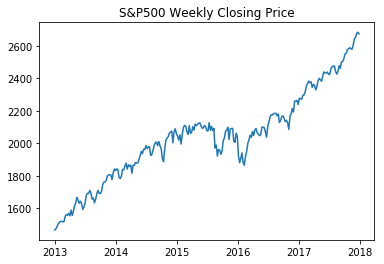

In [8]:
plt.plot(ts)
plt.title('S&P500 Weekly Closing Price')

*Our model is based on weekly closing price*

## Stationarity Test

In [42]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    rol_mean = timeSeries.rolling(window=size).mean()
    rol_weighted_mean = timeSeries.ewm(span=12,min_periods=0,
                                   adjust=True,ignore_na=False).mean()
    rol_std = timeSeries.rolling(window = size).std()


    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    rol_std.plot(color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput


def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=lags, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=lags, ax=ax2)
    plt.show()

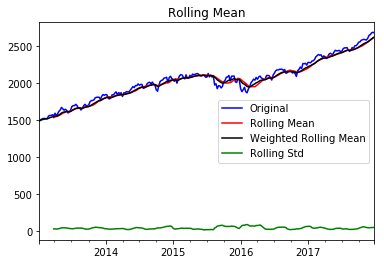

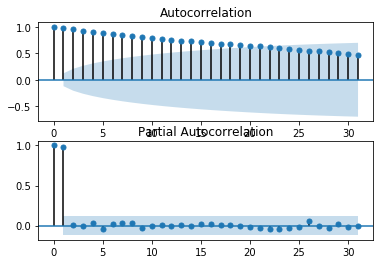

Test Statistic                   0.051245
p-value                          0.962570
#Lags Used                       7.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64

In [43]:
draw_trend(ts,12)
draw_acf_pacf(ts)
testStationarity(ts)

*The original series is not stationary*

## Eliminating Trend

Log transformation

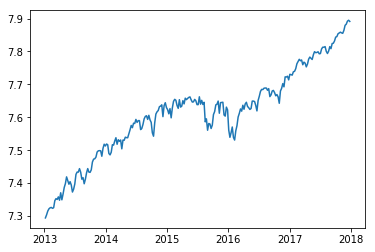

Test Statistic                  -0.983235
p-value                          0.759330
#Lags Used                       7.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64

In [19]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()
testStationarity(ts_log)

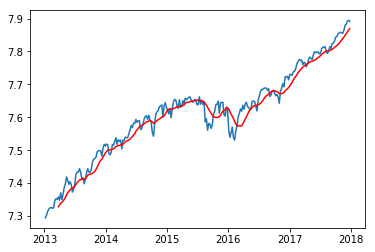

In [37]:
moving_avg = ts_log.rolling(window = 12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

In [45]:
ts_log_moving_diff = ts_log - moving_avg
ts_log_moving_diff.dropna(inplace = True)

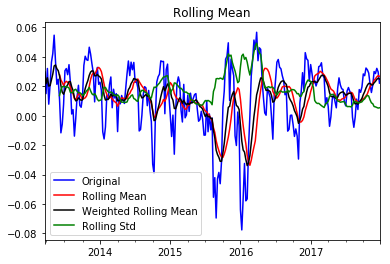

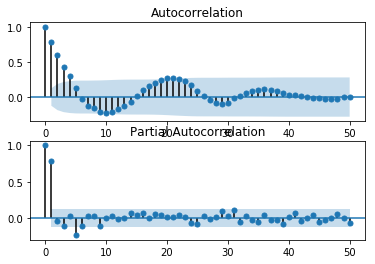

Test Statistic                -6.314557e+00
p-value                        3.173913e-08
#Lags Used                     5.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64

In [46]:
draw_trend(ts_log_moving_diff,12)
draw_acf_pacf(ts_log_moving_diff, 50)
testStationarity(ts_log_moving_diff)

*The series is now stationary.*

## ARMA Modeling

Based on acf-plot and pacf-plot, we choose ARMA(1,4)

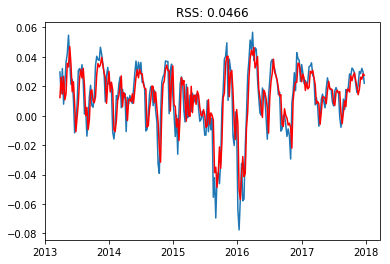

In [49]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_log_moving_diff, order = (1, 4))
result_arma = model.fit(disp = -1)
plt.plot(ts_log_moving_diff)
plt.plot(result_arma.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((result_arma.fittedvalues - ts_log_moving_diff)**2))
plt.show()

        Things to be improved:
        1.prediction of moving average of the original series
        2.choice of ARMA model